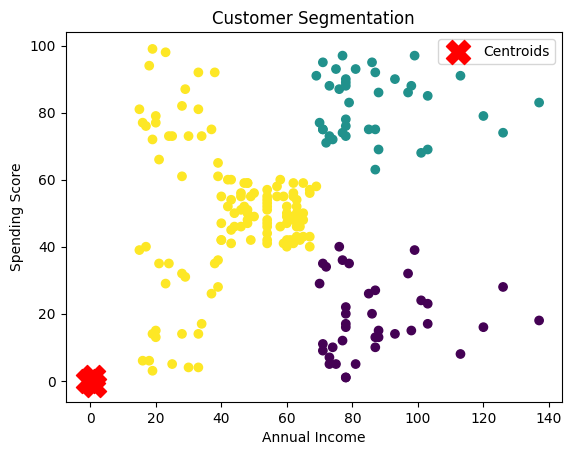

     CustomerID  AnnualIncome  SpendingScore  Cluster
0             1            15             39        2
1             2            15             81        2
2             3            16              6        2
3             4            16             77        2
4             5            17             40        2
..          ...           ...            ...      ...
195         196           120             79        1
196         197           126             28        0
197         198           126             74        1
198         199           137             18        0
199         200           137             83        1

[200 rows x 4 columns]


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data (replace this with your actual purchase history data)
data = pd.read_csv('Mall_Customers.csv')

df = pd.DataFrame(data)

# Select features for clustering (e.g., 'TotalSpent' and 'Frequency')
features = df[['AnnualIncome', 'SpendingScore']]

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters (you may need to tune this based on your specific case)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Display the clustered data
print(df[['CustomerID', 'AnnualIncome', 'SpendingScore', 'Cluster']])
